# Импорт библиотек

In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools

### Отключим предупреждения Anaconda

In [2]:
warnings.simplefilter('ignore')

# Загрузим данные

In [3]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/y.pkl.gz', 'rb'))

# N-PLS1

## Выберем столбец у с которым будем работать

In [4]:
m=0

# Приближение к правильному алгоритму

In [104]:
from sklearn.model_selection import train_test_split

In [345]:
# a-numpy array;  b-pandas array
def error(a,b):
    s=0
    for i in range(0,len(a)):
        s+=((a[i]-b.iloc[i]))**2
    return s

In [386]:
parameters={'numbers_of_learning':8, 'numbers_of_components':55, 'testSize':0.2857, 'column_y':0}

In [387]:
output=np.zeros([parameters['numbers_of_components']])
for v in range(0,parameters['numbers_of_learning']):
    X_train, X_test, y_train, y_test = train_test_split(
        Xdata_numpy["X"], Ydata.iloc[:,parameters['column_y']], test_size=parameters['testSize'] 
        )
    x=X_train
    y=y_train
    y=np.array(y)
    x=np.array(x)
    Tt=[]
    mass=np.zeros([y.shape[0]])
    for f in range(0,parameters['numbers_of_components']):
        z=np.zeros([x.shape[1],x.shape[2]])
        for i in range(0,x.shape[2]):
            for j in range(0,x.shape[1]):
                zsum=0
                for k in range(0,x.shape[0]):
                    zsum= zsum+ x[k,j,i]*y[k]
                z[j,i]=zsum
        Wk, S, WI = np.linalg.svd(z)
        w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
        w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
        t=[]
        for h in range(0,x.shape[0]):
            t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
        t=np.array(t).reshape(x.shape[0],1)
        Tt+=[t]
        T=np.array(Tt).reshape(x.shape[0],f+1)
        bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
        for g in range(0,x.shape[0]):
            x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
        y=y-(np.dot(T,bf))
        mass+=np.dot(T,bf)   
        output[f]+=error(mass,y_train)
np.array(output).reshape(1,parameters['numbers_of_components'])

array([[4.24023266e+04, 3.92289110e+04, 3.45676257e+04, 2.93081401e+04,
        2.37861111e+04, 1.93874057e+04, 1.44464830e+04, 1.07455212e+04,
        8.14104868e+03, 5.81703547e+03, 4.00529531e+03, 2.95058884e+03,
        1.98960745e+03, 8.77723561e+02, 2.60713791e+02, 1.69145763e+02,
        1.30978590e+02, 1.07682611e+02, 4.45160045e+01, 2.03868854e+01,
        1.27182395e+01, 3.78005762e+00, 6.32182290e-01, 1.92709743e-02,
        1.20170093e-03, 4.84813830e-11, 6.97983651e-12, 2.78901277e-12,
        5.69740458e-11, 1.19760735e-11, 2.47171882e-12, 2.40851015e-10,
        7.47135834e-10, 9.93520249e-10, 4.29771012e-09, 8.11640133e-09,
        1.45441340e-08, 1.45234447e-06, 1.84572447e-05, 1.82071290e-05,
        5.00037854e-05, 6.90481768e-02, 3.50703287e-01, 3.82494781e-02,
        9.84265528e-01, 1.35838053e+03, 9.96460089e+03, 4.15266205e+06,
        2.51981200e+08, 5.87499842e+09, 6.46034868e+09, 3.58186416e+10,
        1.97753721e+12, 5.50725546e+14, 4.41564224e+16]])

In [388]:
output

array([4.24023266e+04, 3.92289110e+04, 3.45676257e+04, 2.93081401e+04,
       2.37861111e+04, 1.93874057e+04, 1.44464830e+04, 1.07455212e+04,
       8.14104868e+03, 5.81703547e+03, 4.00529531e+03, 2.95058884e+03,
       1.98960745e+03, 8.77723561e+02, 2.60713791e+02, 1.69145763e+02,
       1.30978590e+02, 1.07682611e+02, 4.45160045e+01, 2.03868854e+01,
       1.27182395e+01, 3.78005762e+00, 6.32182290e-01, 1.92709743e-02,
       1.20170093e-03, 4.84813830e-11, 6.97983651e-12, 2.78901277e-12,
       5.69740458e-11, 1.19760735e-11, 2.47171882e-12, 2.40851015e-10,
       7.47135834e-10, 9.93520249e-10, 4.29771012e-09, 8.11640133e-09,
       1.45441340e-08, 1.45234447e-06, 1.84572447e-05, 1.82071290e-05,
       5.00037854e-05, 6.90481768e-02, 3.50703287e-01, 3.82494781e-02,
       9.84265528e-01, 1.35838053e+03, 9.96460089e+03, 4.15266205e+06,
       2.51981200e+08, 5.87499842e+09, 6.46034868e+09, 3.58186416e+10,
       1.97753721e+12, 5.50725546e+14, 4.41564224e+16])

#### Сразу создам файл для выгрузки результатов этого шага построения модели, что б, когда работа будет идти на финальной стадии не обучаться с нуля

In [389]:
pkl.dump(output,open('C:/Users/admin/Desktop/PLS_continue_2020/output.pkl.gz', 'wb'))

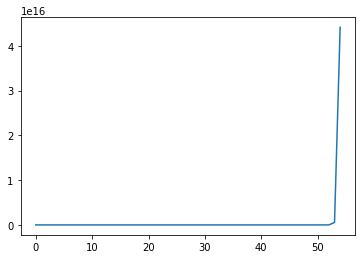

In [390]:
plt.plot(output)
plt.show();

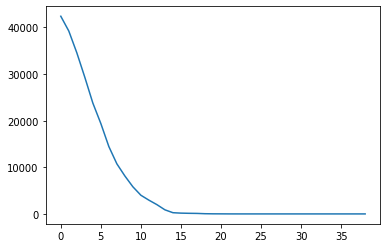

In [391]:
plt.plot(output[0:39])
plt.show();

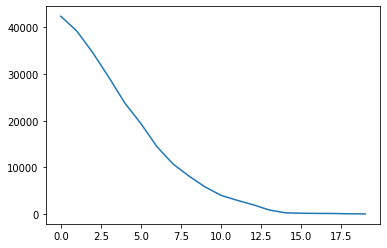

In [392]:
plt.plot(output[0:20])
plt.show();

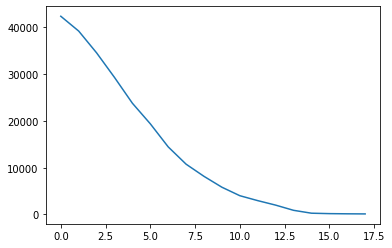

In [393]:
plt.plot(output[0:18])
plt.show();

# Попробую оформить всё в виде полноценного класса

In [ ]:
class N_PLS1():
    def error(a,b):
        s=0
        for i in range(0,len(a)):
            s+=((a[i]-b.iloc[i]))**2
        return s
    def function_1(x,y,fn):
        Tt=[]
        mass=np.zeros([y.shape[0]])
        output=[]
        for f in range(0,fn):
            z=np.zeros([x.shape[1],x.shape[2]])
            for i in range(0,x.shape[2]):
                for j in range(0,x.shape[1]):
                    zsum=0
                    for k in range(0,x.shape[0]):
                        zsum= zsum+ x[k,j,i]*y[k]
                    z[j,i]=zsum
            Wk, S, WI = np.linalg.svd(z)
            w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
            w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
            t=[]
            for h in range(0,x.shape[0]):
                t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
            t=np.array(t).reshape(x.shape[0],1)
            Tt+=[t]
            T=np.array(Tt).reshape(x.shape[0],f+1)
            bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
            for g in range(0,x.shape[0]):
                x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
            y=y-(np.dot(T,bf))
            mass+=np.dot(T,bf)
            output+=[error(mass,y_train)]
        return output
    def fit(x,y,fn):
        
            
        return y

In [179]:
y

array([34.19308759, 35.72443085, 46.32211944, 35.69579348, 47.44184036,
       33.34204937, 42.44462856, 39.9018207 , 44.39973652, 54.64066407,
       53.71596802, 44.04933373, 36.11255278, 34.24246421, 36.22622795,
       26.1974747 , 41.0398005 , 31.41066637, 34.07047331, 42.14770231,
       45.44679116, 21.41118209, 44.54683093, 35.35460545, 36.47993911])